In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, ConfusionMatrixDisplay
from sklearn import metrics

In [3]:
category = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Kaggle/RetailRocket-Recommender-Systems/category_tree.csv')
category

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [4]:
events = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Kaggle/RetailRocket-Recommender-Systems/events.csv')

In [5]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [6]:
item_properties_1 = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Kaggle/RetailRocket-Recommender-Systems/item_properties_part1.csv')

In [7]:
item_properties_1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [8]:
item_properties_1

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
...,...,...,...,...
10999994,1439694000000,86599,categoryid,618
10999995,1435460400000,153032,1066,n1020.000 424566
10999996,1440298800000,421788,888,35975 856003 37346
10999997,1437879600000,159792,400,n552.000 639502 n720.000 424566


In [9]:
item_properties_2 = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Kaggle/RetailRocket-Recommender-Systems/item_properties_part2.csv')

In [10]:
item_properties_2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [11]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


Which events have transactionid not null?

In [12]:
events[events.transactionid.notna()].event.unique()

array(['transaction'], dtype=object)

Which events have transactionid null?

In [ ]:
the rows where transaction id is not null are the events of just viewing or add to cart

In [13]:
events[events.transactionid.isnull()].event.unique()

array(['view', 'addtocart'], dtype=object)

The events where transactionid is null are the events of view and addtocart

In [14]:
category.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


What are the items under categoryid 1016?

In [15]:
item_properties_1.loc[(item_properties_1.property == 'categoryid') & (item_properties_1.value == '1016')].sort_values(by='timestamp')

,timestamp,itemid,property,value
6363096,1431226800000,339403,categoryid,1016
8597591,1431226800000,161686,categoryid,1016
7942027,1431226800000,418837,categoryid,1016
10230975,1431226800000,85538,categoryid,1016
7280176,1431226800000,278463,categoryid,1016
5003646,1431226800000,36918,categoryid,1016
4497603,1431226800000,390209,categoryid,1016
9496408,1431226800000,276491,categoryid,1016
3826363,1431226800000,373242,categoryid,1016
9715378,1431226800000,90376,categoryid,1016


In [16]:
item_properties_1.property.unique()

array(['categoryid', '888', '400', ..., '424', '494', '712'], dtype=object)

who are customers who bought something?

In [17]:
customer_purchased = events[events.transactionid.notna()].visitorid.unique()

In [18]:
customer_purchased.size

11719

In [19]:
customer_purchased[:10] #sample list of visitorid who bought something

array([ 599528,  121688,  552148,  102019,  189384,  350566,  404403,
        505565,  945184, 1406787])

all customers

In [20]:
all_customers = events.visitorid.unique()
all_customers.size

1407580

Customers who bought nothing, just viewing and add to cart

In [21]:
1407580-11719 #customers who bought nothing, just viewing and add to cart

1395861

out of 1,407,580 customers there are 1,395,861 customers who did not buy anything

## Buying Journey

Buying journey of visitorid 102019

In [22]:
events[events.visitorid == 102019].sort_values(by='timestamp')

,timestamp,visitorid,event,itemid,transactionid
19690,1433175714335,102019,view,49521,NaN
19501,1433175801314,102019,addtocart,49521,NaN
14842,1433175812596,102019,view,150318,NaN
19573,1433175871497,102019,view,49521,NaN
8701,1433175894837,102019,view,49521,NaN
19708,1433175945872,102019,view,150318,NaN
8740,1433176042269,102019,view,49521,NaN
814,1433176736375,102019,transaction,150318,13556.0
19724,1433176736422,102019,transaction,49521,13556.0


Customer who bought the same product?

2 customers who bought the product with itemid 150318

In [23]:
events[(events.itemid == 150318) & (events.event == 'transaction')]

,timestamp,visitorid,event,itemid,transactionid
814,1433176736375,102019,transaction,150318,13556.0
1676467,1431538858422,953198,transaction,150318,1034.0


## Recommendation of items based on items purchased together

We can recommend the items that were previously bought together along with the item currently viewing.

Eg., if customer is viewing e-scooter, generally previously bought items may include U-lock, air-pump, basket etc.,

In [24]:
customer_purchased = events[events.transactionid.notna()].visitorid.unique()

In [25]:
customer_purchased.size

11719

Getting all the items that are bought together

In [26]:
purchased_items = []

for customer in customer_purchased:
    purchased_items.append(list(events.loc[(events.visitorid == customer) & (events.transactionid.notnull())].itemid.values))

In [381]:
purchased_items[:5]

[[356475],
 [15335,
  380775,
  237753,
  317178,
  12836,
  400969,
  105792,
  25353,
  200793,
  80582,
  302422],
 [81345],
 [150318, 49521],
 [310791, 299044]]

In [27]:
def recommender_bought(item_id, purchased_items):
    recommender_list = []
    for x in purchased_items:
        if item_id in x:
            recommender_list += x
            
    recommender_list = list(set(recommender_list) - set([item_id]))
    
    return recommender_list

In [28]:
recommender_bought(302422, purchased_items )

[105792, 200793, 12836, 80582, 380775, 15335, 400969, 25353, 237753, 317178]

## Recommendation of items based on category the item currently being viewed belongs

We can recommend the customer with items in the same category.

Eg., if customer is viewing kitchen item knife, we can recommend other knife, scissors, cutting boards, blades etc.,

In [30]:
categories = item_properties_1[item_properties_1.property == 'categoryid'].value.unique()

In [40]:
items_in_category = []
for category in categories:
    items_in_category.append(list(item_properties_1[(item_properties_1.value == category)].itemid.unique()))

Items_in_category has items belonging to same category in list of lists 

In [42]:
def recommender_similar_items(item_id, items_in_category):
    recommender_list2 = []
    for x in items_in_category:
        if item_id in x:
            recommender_list2 += x
            
    recommender_list2 = list(set(recommender_list2) - set([item_id]))
    
    return recommender_list2

In [44]:
recommender_similar_items(276491, items_in_category)

[390209,
 73730,
 201154,
 377283,
 312837,
 98949,
 90376,
 339403,
 125521,
 181587,
 220116,
 418837,
 161686,
 187263,
 138777,
 209439,
 235999,
 85538,
 464482,
 186663,
 190569,
 339754,
 360044,
 46702,
 350255,
 36918,
 362999,
 29689,
 373242,
 278463]

Other metrics we can add are 

#number of people who are currently added it to cart

#number of people who purchased the item

# Gathering aggregated information in dataframe

In [47]:
#All customers
all_visitors = events.visitorid.unique()
all_visitors.size

1407580

In [48]:
buying_visitors = events[events.event == 'transaction'].visitorid.unique()
buying_visitors.size

11719

In [234]:
buying_visitors_list = list(buying_visitors)

In [51]:
viewing_visitors_list = list(set(all_visitors) - set(buying_visitors))

In [202]:
def create_dataframe(visitor_list):
    
    array_for_df = []
    for index in visitor_list:

        #Create that visitor's dataframe once
        v_df = events[events.visitorid == index]

        temp = []
        #Add the visitor id
        temp.append(index)

        #Add the total number of unique products viewed
        temp.append(v_df[v_df.event == 'view'].itemid.unique().size)

        #Add the total number of views regardless of product type
        temp.append(v_df[v_df.event == 'view'].event.count())

        #Add the total number of purchases
        number_of_items_bought = v_df[v_df.event == 'transaction'].event.count()
        temp.append(number_of_items_bought)

        #Then put either a zero or one if they made a purchase
        if(number_of_items_bought == 0):
            temp.append(0)
        else:
            temp.append(1)

        array_for_df.append(temp)
    
    return pd.DataFrame(array_for_df, columns=['visitorid', 'num_items_viewed', 'view_count', 'bought_count', 'purchased'])

Getting all the buying_visitors and num of items viewed, num of times viewed, numbers of items bought, also adding a column "purchased" for machine learning model training

In [55]:
buying_visitors_df = create_dataframe(buying_visitors)

In [57]:
buying_visitors_df.shape

(11719, 5)

In [59]:
buying_visitors_df.head()

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,599528,2,15,1,1
1,121688,13,15,11,1
2,552148,1,1,1,1
3,102019,2,6,2,1
4,189384,7,25,2,1


Getting all the viewing_visitors and num of items viewed, num of times viewed, numbers of items bought, also adding a column "purchased" for machine learning model training

In [60]:
viewing_visitors_df = create_dataframe(viewing_visitors_list)

In [61]:
viewing_visitors_df[0:27800]

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,0,3,3,0,0
1,1,1,1,0,0
2,2,4,8,0,0
3,3,1,1,0,0
4,4,1,1,0,0
...,...,...,...,...,...
27795,28008,1,2,0,0
27796,28009,1,1,0,0
27797,28010,2,3,0,0
27798,28011,2,3,0,0


# Business Metric: Conversion Rate

Gathering aggregated information of items in a dataframe and calculating conversion rate of each product

convertion_rate = (number_of_visitors_bought_item/view_count_visitors)*100

In [307]:
def create_dataframe_items(items_list):
    
    array_for_df = []
    for index in items_list:

        #Create that item's dataframe once
        items_df = events[events.itemid == index]

        temp = []
        #Add the item id
        temp.append(index)

        #Add the total number of unique products viewed
        visitors_viewed = items_df[items_df.event == 'view'].visitorid.unique().size
        temp.append(visitors_viewed)

        #Add the total number of views regardless of product type
        view_count_visitors = items_df[items_df.event == 'view'].visitorid.count()
        temp.append(view_count_visitors)

        #Add the total number of purchases
        number_of_visitors_bought_item = items_df[items_df.event == 'transaction'].visitorid.count()
        temp.append(number_of_visitors_bought_item)
        
        #Conversion rate
        if view_count_visitors != 0:
            convertion_rate = (number_of_visitors_bought_item/visitors_viewed)*100
            temp.append(convertion_rate)

        array_for_df.append(temp)
    
    return pd.DataFrame(array_for_df, columns=['itemid', 'visitors_viewed', 'total_views', 'bought_count', 'convertion_rate'])

In [304]:
items_list = events.itemid.unique()

In [305]:
items_list

array([355908, 248676, 318965, ...,    613,  52086, 177353])

In [308]:
item_purchase_info = create_dataframe_items(items_list)

## Conversion Rate for each product

In [309]:
item_purchase_info.head()

,itemid,visitors_viewed,total_views,bought_count,convertion_rate
0,355908,46,57,0,0.000000
1,248676,24,29,2,8.333333
2,318965,13,15,0,0.000000
3,253185,10,14,0,0.000000
4,367447,201,249,1,0.497512


## Identify the items whose conversion rate is less than 5% for ad campaigns

In [384]:
ad_campaign = []
ad_campaign = item_purchase_info.loc[item_purchase_info['convertion_rate'] < 5, 'itemid'].tolist()

list ad_campaign has list of itemids whose converstion rate is less than 5%, send this list to ad campaigns

# Business Metric: Churn Rate

Converting Unix timestamp to datetime

In [119]:
events['timestamp'] = events['timestamp'].astype(str).str[:10]
events['timestamp'] = events['timestamp'].astype(int).apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))


In [120]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 00:02:12,257597,view,355908,NaN
1,2015-06-02 00:50:14,992329,view,248676,NaN
2,2015-06-02 00:13:19,111016,view,318965,NaN
3,2015-06-02 00:12:35,483717,view,253185,NaN
4,2015-06-02 00:02:17,951259,view,367447,NaN


In [123]:
events.timestamp.min(), events.timestamp.max() 

('2015-05-02 22:00:04', '2015-09-17 21:59:47')

Track Purchases in the Period:

List all visitor_ids who made at least one purchase in the given period (e.g., in the last month). 
These are your active customers.

In [133]:
import datetime

def create_dataframe_churn(visitor_list):  # Pass only purchased visitors list
    array_for_df = []

    # Define the reference date and ensure it is a datetime object
    reference_date = datetime.datetime(2015, 9, 17, 21, 59, 47)

    
    for visitor_id in visitor_list:
        
        visitor_churn_df = events[events['visitorid'] == visitor_id]

        temp = []
        temp.append(visitor_id)

        # Get the last purchase date for this visitor
        last_purchase_date = visitor_churn_df['timestamp'].max()

        # Ensure that the last purchase date is a datetime object (it should already be, but let's confirm)
        if isinstance(last_purchase_date, str):
            last_purchase_date = pd.to_datetime(last_purchase_date)
        
        # Add the last purchase date to the temporary list
        temp.append(last_purchase_date)

        # Calculate churn by days (days since last purchase)
        # Ensure that both reference_date and last_purchase_date are datetime objects
        churn_by_days = reference_date - last_purchase_date

        # Convert the result to days (not a timedelta)
        churn_by_days = churn_by_days.days  # Extract days from timedelta

        # Add churn by days to the temporary list
        temp.append(churn_by_days)

        # Append the result for this visitor to the main list
        array_for_df.append(temp)

    # Return a DataFrame with the results
    return pd.DataFrame(array_for_df, columns=['visitorid', 'last_purchase_date', 'churn_by_days'])


In [134]:
buying_visitors_churn_df = create_dataframe_churn(buying_visitors)

In [135]:
buying_visitors_churn_df.head()

,visitorid,last_purchase_date,churn_by_days
0,599528,2015-08-25 13:32:03,23
1,121688,2015-06-01 16:18:21,108
2,552148,2015-06-01 16:25:15,108
3,102019,2015-06-01 11:38:56,108
4,189384,2015-08-25 09:52:56,23


If 
customer A has churned by 20 days

customer B has churned by 30 days

customer C has churned by 40 days

Then we take average of A,B,C ie., 20+30+40/3 = 90/3 = 30 days as the churn threshold

In [136]:

avg_churn_days = buying_visitors_churn_df['churn_by_days'].mean()
avg_churn_days

64.36180561481355

Here churn threshold is 64 days

In [143]:
churned_customers = buying_visitors_churn_df[buying_visitors_churn_df['churn_by_days'] > 64].visitorid.unique()

In [145]:
churned_customers.size

5706

There are 5706 customers whose last purchase was 64 days ago.

We can get the list of these customers and send them to ad campaigning team or customized deals for these customers to retain these customers

## List of churned customers for ad campaigns, customized deals

In [385]:
churned_customers[:10]

array([ 121688,  552148,  102019,  350566,  404403,  505565,  945184,
       1406787,  820159,  319880])

In [147]:
all_customers.size

1407580

In [151]:
Churn_rate = (churned_customers.size/buying_visitors.size)*100
Churn_rate

48.69016127655944

## Churn rate is 48%

## Retention rate is 52%

In [153]:
buying_visitors_df.head()

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,599528,2,15,1,1
1,121688,13,15,11,1
2,552148,1,1,1,1
3,102019,2,6,2,1
4,189384,7,25,2,1


In [152]:
buying_visitors_df.shape

(11719, 5)

In [154]:
viewing_visitors_df.head()

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,0,3,3,0,0
1,1,1,1,0,0
2,2,4,8,0,0
3,3,1,1,0,0
4,4,1,1,0,0


In [155]:
viewing_visitors_df.shape

(1395861, 5)

In [156]:
viewing_visitors_df2 = viewing_visitors_df[:27821]

In [157]:
viewing_visitors_df2

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,0,3,3,0,0
1,1,1,1,0,0
2,2,4,8,0,0
3,3,1,1,0,0
4,4,1,1,0,0
...,...,...,...,...,...
27816,28029,1,1,0,0
27817,28030,3,3,0,0
27818,28031,1,1,0,0
27819,28032,1,1,0,0


In [158]:
maindf = pd.concat([buying_visitors_df,viewing_visitors_df2])

In [159]:
maindf

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,599528,2,15,1,1
1,121688,13,15,11,1
2,552148,1,1,1,1
3,102019,2,6,2,1
4,189384,7,25,2,1
...,...,...,...,...,...
27816,28029,1,1,0,0
27817,28030,3,3,0,0
27818,28031,1,1,0,0
27819,28032,1,1,0,0


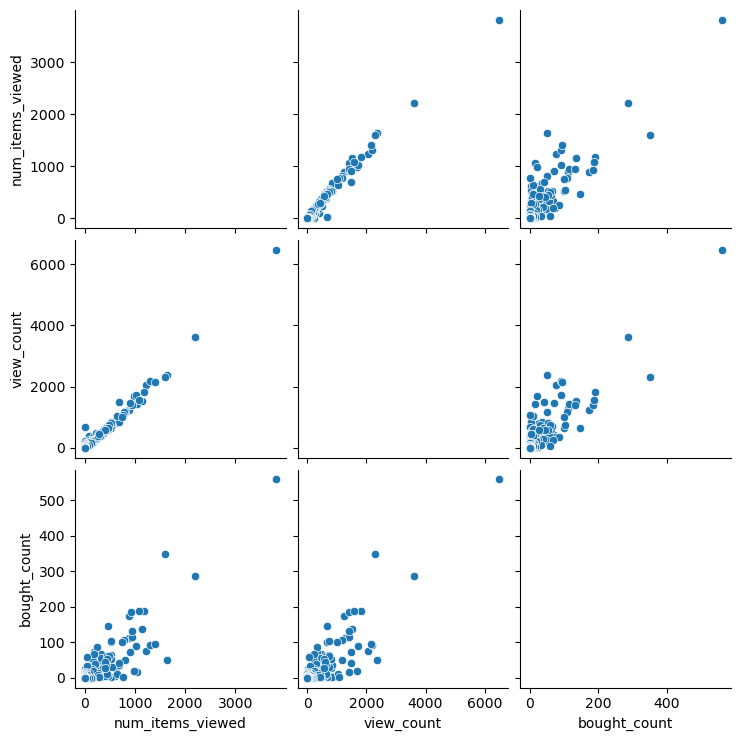

In [165]:
sns.pairplot(x_vars=['num_items_viewed','view_count','bought_count'],y_vars=['num_items_viewed','view_count','bought_count'],data=maindf)
plt.show()

## As the numer of items_viewed increase bought_count increases
## As the views increases bought count increases
## there is the linear relationship 
## This is a classification problem that predicts whether the user will purchase and item or not, so we will apply Logistic Regression for model training

In [172]:
X = maindf[['view_count','bought_count']]
y = maindf['purchased']

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.25)

In [174]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [176]:
w,b = model.coef_[0],model.intercept_[0]
w,b

(array([ 0.02892563, 13.49378179]), -7.410318195350437)

In [177]:
X.view_count+X.bought_count+b

0         8.589682
1        18.589682
2        -5.410318
3         0.589682
4        19.589682
           ...    
27816    -6.410318
27817    -4.410318
27818    -6.410318
27819    -6.410318
27820    -6.410318
Length: 39540, dtype: float64

In [178]:
y_predict = X.view_count+X.bought_count+b

In [ ]:
y_predict = X.view_count+X.bought_count+b

In [181]:
1/(1+np.exp(-y_predict))

0        0.999814
1        1.000000
2        0.004450
3        0.643292
4        1.000000
           ...   
27816    0.001642
27817    0.012005
27818    0.001642
27819    0.001642
27820    0.001642
Length: 39540, dtype: float64

In [182]:
p = 1/(1+np.exp(-y_predict))

In [386]:
y_predict = [1 if i > 0.5 else 0 for i in p]
y_predict[:10]

[1, 1, 0, 1, 1, 1, 1, 0, 0, 1]

In [191]:
y_predict = model.predict(X_test)

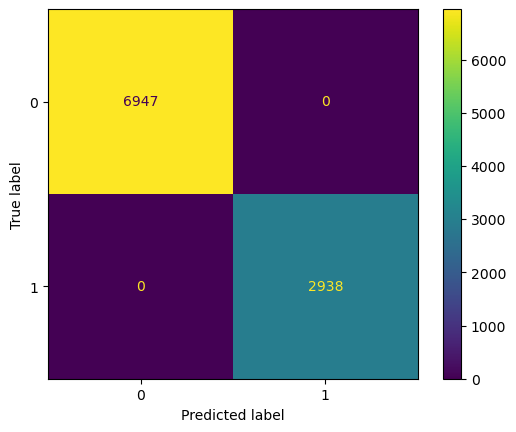

In [192]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [193]:
X = maindf[['view_count','bought_count','num_items_viewed']]
y = maindf['purchased']

In [194]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.25)

In [195]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

## Create Randomness in input data

In [316]:
import random
random.shuffle(buying_visitors_list)
buying_visitors_df = create_dataframe(buying_visitors_list)

In [317]:
import random
random.shuffle(viewing_visitors_list)

In [318]:
viewing_visitor_df = create_dataframe(viewing_visitors_list[0:27820])

In [346]:
maindf = pd.concat([viewing_visitors_df,buying_visitors_df])

In [347]:
maindf

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,0,3,3,0,0
1,1,1,1,0,0
2,2,4,8,0,0
3,3,1,1,0,0
4,4,1,1,0,0
...,...,...,...,...,...
11714,482401,1,3,1,1
11715,574370,15,24,1,1
11716,1017798,2,2,1,1
11717,658473,2,2,1,1


In [369]:
ids = maindf['visitorid'][422274:]
ids.shape

(985306,)

In [361]:
X = maindf[['view_count','bought_count','num_items_viewed']]
y = maindf['purchased']

In [362]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.7)

In [363]:
X_train.shape

(422274, 3)

In [364]:
model = LogisticRegression()

In [365]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9999989850868665

In [366]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [367]:
y_predict.shape

(985306,)

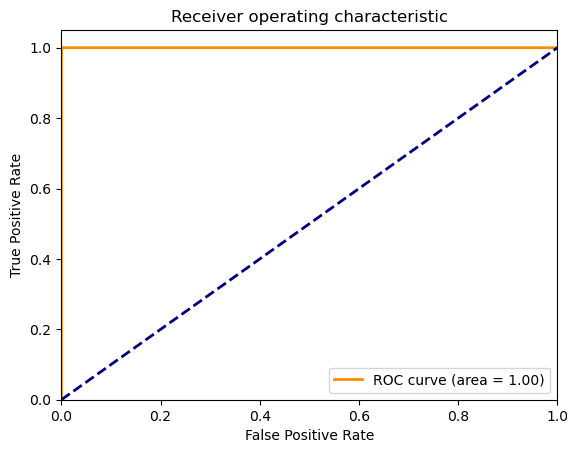

In [327]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

This shows that the model is perfect model with just 0.1% of error. This may be because of overtting.

I will improve the model performance in other projects. The purpose of this project is recommender systems and this is 
rightly acheived.

In [373]:
result_df = pd.DataFrame({
    'VisitorId': ids,  # Extract IDs from the original DataFrame
    'Purchase': y_predict
})

# Save to Excel
result_df.to_csv('/Users/navyatrilok/Documents/DATASCIENCE/Kaggle/RetailRocket-Recommender-Systems/Predictions.csv', index=False)

In [374]:
results = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Kaggle/RetailRocket-Recommender-Systems/Predictions.csv')
results.head()

,VisitorId,Purchase
0,425755,0
1,425756,0
2,425757,0
3,425758,0
4,425759,0


In [377]:
campaign_list = results[results.Purchase == 0].VisitorId.unique()

In [387]:
campaign_list[:10]

array([425755, 425756, 425757, 425758, 425759, 425760, 425761, 425762,
       425763, 425764])

## These are the items model predicted that there will be no purchase, send these items for ad campaining or business should stop buying these items from its vendor as there will be no sales for these products